# MNIST

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [2]:
# TODO

## Load data

In [2]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [29]:
# TODO
print(train_labels)

[1 7 0 ... 5 0 6]


##  Data exploration

### Question 1
Hint: `plt.imshow`

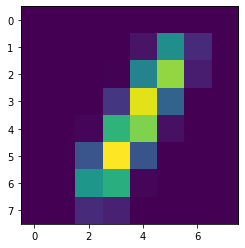

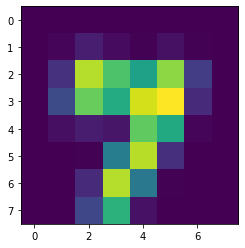

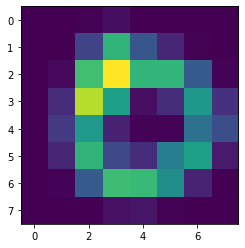

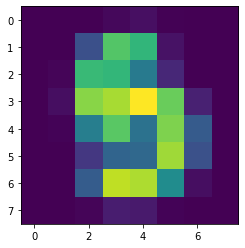

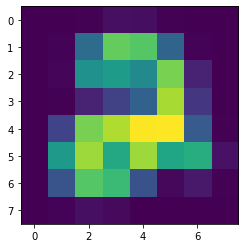

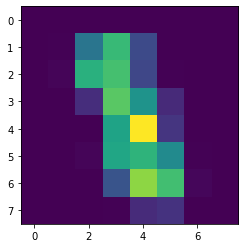

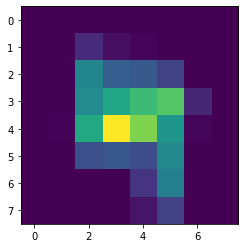

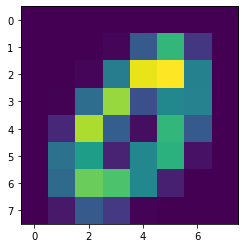

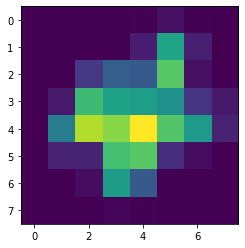

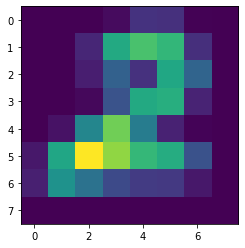

In [4]:
# TODO
i = 0
for m in mnist_8x8_train:
    if i < 10:
        plt.imshow(m)
        plt.show()
        i += 1
    else:
        pass
    

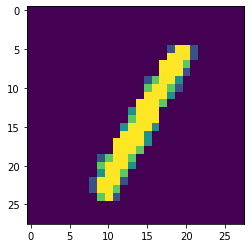

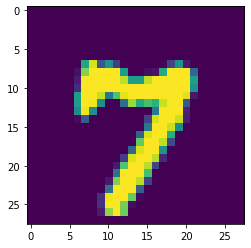

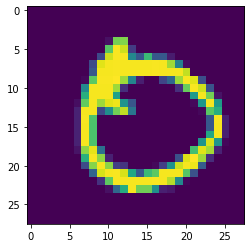

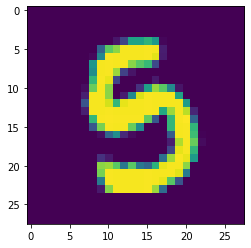

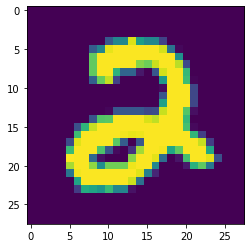

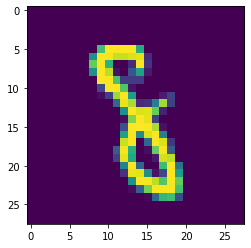

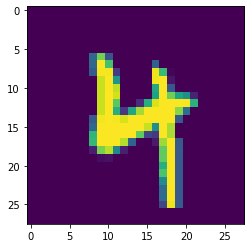

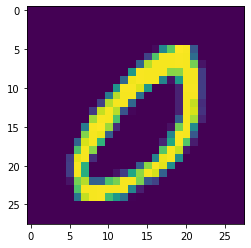

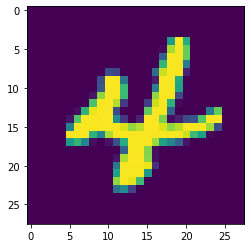

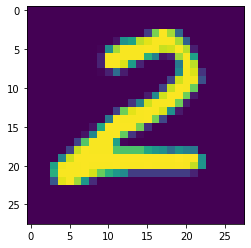

In [5]:
# TODO
i = 0
for m in mnist_28x28_train:
    if i < 10:
        plt.imshow(m)
        plt.show()
        i += 1
    else:
        pass

##  Data Preparations

### Question 1

In [27]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Normalizer


class NDNormalizer(TransformerMixin):
    def __init__(self, **kwargs):
        self._scaler = Normalizer(copy=True, **kwargs)
        self._orig_shape = None

    def fit(self, X, **kwargs):
        X = np.array(X)
        # Save the original shape to reshape the flattened X later
        # back to its original shape
        if len(X.shape) > 1:
            self._orig_shape = X.shape[1:]
        X = self._flatten(X)
        self._scaler.fit(X, **kwargs)
        return self

    def transform(self, X, **kwargs):
        X = np.array(X)
        X = self._flatten(X)
        X = self._scaler.transform(X, **kwargs)
        X = self._reshape(X)
        return X

    def _flatten(self, X):
        # Reshape X to <= 2 dimensions
        if len(X.shape) > 2:
            n_dims = np.prod(self._orig_shape)
            X = X.reshape(-1, n_dims)
        return X

    def _reshape(self, X):
        # Reshape X back to it's original shape
        if len(X.shape) >= 2:
            X = X.reshape(-1, *self._orig_shape)
        return X

In [28]:
# Normalize data - the pixels are already well seperated, quality improves by a lot in 28x28 compared to 8x8. 
# A simple normaliztion should be sufficient.
from sklearn.preprocessing import Normalizer

# sc = NDNormalizer()
# x8_train = sc.transform(sc.fit(mnist_8x8_train))
# x28_train = sc.transform(sc.fit(mnist_28x28_train))

sc = Normalizer()
x8_train = np.full_like(mnist_8x8_train, fill_value=0)
x28_train = np.full_like(mnist_28x28_train, fill_value=0)
x8_test = np.full_like(mnist_8x8_test, fill_value=0)
x28_test = np.full_like(mnist_28x28_test, fill_value=0)

for i in range(mnist_8x8_train.shape[1]):
    x8_train[:, i, :] = sc.fit_transform(mnist_8x8_train[:, i, :]) 

for i in range(mnist_8x8_test.shape[1]):
    x8_test[:, i, :] = sc.transform(x8_test[:, i, :])
    
for i in range(mnist_28x28_train.shape[1]):
    x28_train[:, i, :] = sc.fit_transform(mnist_28x28_train[:, i, :]) 

for i in range(mnist_28x28_test.shape[1]):
    x28_test[:, i, :] = sc.transform(x28_test[:, i, :])

## Experiments

### Question 1

In [33]:
from sklearn.model_selection import train_test_split

models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(C=10, kernel="poly", random_state=42),
    "LogisticRegression": LogisticRegression(C=10, penalty="none", random_state=42),
}

In [34]:
print(models)

{'GaussianNB': GaussianNB(priors=None, var_smoothing=1e-09), 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'), 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance'), 'SVM': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False), 'LogisticRegressio

In [36]:
# Split data
from sklearn.model_selection import train_test_split

X8_train, X8_test, y8_train, y8_test = train_test_split(x8_train, 
                                train_labels, test_size=0.1, random_state=42, shuffle=True, stratify=train_labels)


X28_train, X28_test, y28_train, y28_test = train_test_split(x28_train, 
                                train_labels, test_size=0.1, random_state=42, shuffle=True, stratify=train_labels)

### Question 3

In [41]:
# TODO
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f = f1_score(pred, y_test, average='weighted')
    acc = accuracy_score(pred, y_test)
    print(name, " | F1: ", f, " | Accuracy: ", acc)

# k-fold
score = []
for name, model in models.items():
    tmp_acc = k_fold_fit_and_evaluate(X_train, y_train, model, scoring_method)
    m_acc = np.mean(tmp_acc)
    std_acc = np.std(tmp_acc)
    print(name, " | mean accuracy: ", m_acc, " | std accuracy: ", std_acc)

ValueError: Found array with dim 3. Estimator expected <= 2.

### Question 4 

In [10]:
#TODO

### Question 5

In [11]:
#TODO

### Question 6

In [12]:
#TODO
prediction = np.array([-1] * len(mnist_8x8_test)) #TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)